In [684]:
import csv
import json
from datetime import timedelta
from urllib.request import urlopen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import datetime


In [685]:
print("Wpływ COVID na świat kryptowalut")

Wpływ COVID na świat kryptowalut


In [686]:
#1.Porównywanie czy wraz ze wzrostem zachorowań wzrasta równiez ogólny poziom biedy
#2.Czy za każdym jak był wzrost zachorowań  to ceny kryptowalut się gwałtowanie zmieniały(procentowo)
#3.Jak ilość śmierci w 5 największych państwach wpłyneło na średnią pensję informatyków w pythonie w polsce
#4.Czy w tych państwach w których był największy covid podskoczyła liczba samobójstw i liczbę stwierdzonych depresji niż w tych w których było najmniej przypadków?
#5.Czy wielkość kraju miała wpływ na szybkość(rekord szybkości rozprzestrzeniania się )
#7. Czy w krajach w których jest starsze społeczeńśtwo i jest więcej szowinistów było więcej śmierci wśród męzczyzn
#8.Czy w krajach w których średni poziom inteligencji jest najwyższy było najwięcej szczepionek
#źródlo danych
# https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv

In [687]:
#import danych
full_table = pd.read_csv('Dataset-recent.csv')

genderData=pd.read_csv('summary_data_clean.csv')
iqData=pd.read_csv('iqdata.csv')
full_grouped = pd.read_csv('full_grouped.csv')
full_grouped['Date'] = pd.to_datetime(full_grouped['Date'])

In [688]:
#przekształcenie danych stricte do wykresów dziennych i połączenie danych COVID i kursy cryptowalut(W doskonałej większości są one uzależnione od BTC(co pokażemy w następnych wykresach)
full_grouped = pd.read_csv('full_grouped.csv')
full_grouped['Date'] = pd.to_datetime(full_grouped['Date'])
#IMPORT DANYCH Z COVID(bierzemy wszystkie dane)
columnListCOVID=["Date","New cases"]
day_wise = pd.read_csv('day_wise.csv',usecols=columnListCOVID)
day_wise['Date'] = pd.to_datetime(day_wise['Date'])
day_wise['Date'] = day_wise['Date'].dt.date
print(type(day_wise))
#sprawdzamy czy dane są unikatowe
# print(day_wise.nunique())
#import danych z bitcoin
columnListBTC=["Date","High"]
bitCoinPrice= pd.read_csv('coin_BitCoin.csv',usecols=columnListBTC)
bitCoinPrice['Date']=pd.to_datetime(bitCoinPrice['Date'])
#we are stripping data from hours/minutes/seconds
bitCoinPrice['Date']=bitCoinPrice['Date'].dt.date
#bierzemy dane od 2020-01-22 do 2020-06-17
filterBTC=bitCoinPrice[(bitCoinPrice['Date'] >= pd.Timestamp('2020-01-22')) & (bitCoinPrice['Date'] <= pd.Timestamp('2020-06-17'))]
#sprawdzamy czy dane są unikatowe
# print(x.nunique())
print(type(filterBTC))
#łączymy dwie kolumny
merged_data=pd.merge(day_wise,filterBTC,how='inner',on='Date')
# print(len(merged_data))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


C:\Users\PrzemekZiemia\PycharmProjects\bigDataJupyter\venv\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



In [689]:
#now we are making plots
subfig = make_subplots(specs=[[{"secondary_y": True}]])
fig = px.bar(merged_data, x="Date", y="New cases", width=700, color_discrete_sequence=['#E11584'])
fig2 = px.line(merged_data, x="Date", y="High", width=700, color_discrete_sequence=['#FFC0CB'])
fig2.update_traces(yaxis="y2")
subfig.add_traces(fig.data + fig2.data)
subfig.layout.xaxis.title="Time"
subfig.layout.yaxis.title="BTC"
subfig.layout.yaxis2.title="New Cases"
subfig.update_layout(xaxis_rangeslider_visible=True)
subfig.show()

#jakies gówno
def plot_daywise(col, hue):
    fig = px.bar(day_wise, x="Date", y=col, width=700, color_discrete_sequence=['#FFC0CB'])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")

    fig.show()
def plot_daywisee(col, hue,x):
    fig = px.line(x, x="Date", y=col, width=700, color_discrete_sequence=['#FFC0CB'])
    # fig.add_bar(day_wise, x="Date", y='New cases',name="Nowe przypadki covid")
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.update_layout(xaxis_rangeslider_visible=True)
    fig.show()
# plot_daywisee("High",'#FFC0CB',filterBTC)
#nowe przypadki


In [690]:
#Teraz zbadamy czy w tych krajach w których jest największy poziom inteligencji było najwięcej osób zaszczepionych(w procentach)

In [691]:
from plotly.offline import iplot
columnListVac=['country','people_vaccinated_per_hundred']
countryVac=pd.read_csv('country_vaccinations.csv',usecols=columnListVac)

mergCountryVac=countryVac.groupby(['country']).max()
#importujemy dane dot. inteligencji
columnListIQ=['country','iq']
cIQ=pd.read_csv('iqdata.csv',usecols=columnListIQ)
mergedIQVAC=pd.merge(cIQ,mergCountryVac,how='inner',on='country')
# fig = px.choropleth(locations=country_vaccine['Country'],
#                     locationmode="country names",
#                     height = 800
#                    )
#pod uwagę będzie brane wszystkie pańśtwa

In [692]:
#we are now doing more graphs
import plotly.graph_objects as go
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = mergedIQVAC['iq'],
                   colorscale = 'Electric',
                   showscale = True),
        dimensions = list([
            dict(
                 label = "people_vaccinated", values = mergedIQVAC['people_vaccinated_per_hundred']),
            dict(
                 label = 'iq', values = mergedIQVAC['iq']),])
    )
)

fig.show()

     Symbol_x                Date        High_x Symbol_y       High_y Symbol  \
0         BTC 2015-08-08 23:59:59    279.928009      ETH     2.798810    LTC   
1         BTC 2015-08-09 23:59:59    267.002991      ETH     0.879810    LTC   
2         BTC 2015-08-10 23:59:59    267.032013      ETH     0.729854    LTC   
3         BTC 2015-08-11 23:59:59    270.385986      ETH     1.131410    LTC   
4         BTC 2015-08-12 23:59:59    270.673004      ETH     1.289940    LTC   
...       ...                 ...           ...      ...          ...    ...   
2155      BTC 2021-07-02 23:59:59  33939.588699      ETH  2155.596496    LTC   
2156      BTC 2021-07-03 23:59:59  34909.259899      ETH  2237.567155    LTC   
2157      BTC 2021-07-04 23:59:59  35937.567147      ETH  2384.286857    LTC   
2158      BTC 2021-07-05 23:59:59  35284.344430      ETH  2321.922836    LTC   
2159      BTC 2021-07-06 23:59:59  35038.536363      ETH  2346.294874    LTC   

            High  
0       4.223640  
1

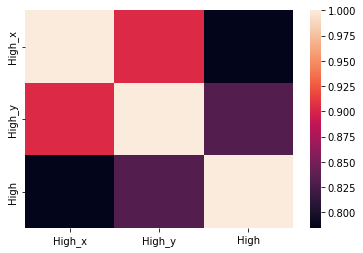

In [693]:
import scipy
import seaborn as sns
#Sprawdzimy czy inne kryptowaluty(pokażemy dlaczego analizowalismy tylko BTC w pierwszym wykresie)
#BTC VS ETHEREUM VS Litecoin vs inne

columnListcrypto=["Symbol","Date","High"]
bitCoinPrice= pd.read_csv('coin_BitCoin.csv',usecols=columnListcrypto)
bitCoinPrice['Date']=pd.to_datetime(bitCoinPrice['Date'])
#eth
columnListBTC=["Symbol","Date","High"]
ETHPrice= pd.read_csv('coin_Ethereum.csv',usecols=columnListcrypto)
ETHPrice['Date']=pd.to_datetime(ETHPrice['Date'])
#litecoin
columnListcrypto=["Symbol","Date","High"]
liteCoinPrice= pd.read_csv('coin_Litecoin.csv',usecols=columnListcrypto)
liteCoinPrice['Date']=pd.to_datetime(liteCoinPrice['Date'])
merged_data=pd.merge(pd.merge(bitCoinPrice,ETHPrice,on='Date',how='inner'),liteCoinPrice,on='Date',how='inner')
print(merged_data)
merged_data.corr(method='kendall')
sns.heatmap(merged_data.corr())
fig = px.imshow(merged_data.corr(method='kendall'),  labels=dict(x="Korelacja kryptowalut", y="Nazwa", color="Productivity"),
                x=['BTC', 'ETH', 'LTC'],
                y=['BTC', 'ETH', 'LTC'], text_auto=True)
fig.show()

In [694]:
#skorzystamy z korelacji kendalla do ukazania tego zjawiska